# Breast Cancer Wisconsin (Diagnostic)

### O objetivo deste projeto foi desenvolver e avaliar modelos de aprendizado de máquina para prever o diagnóstico de câncer de mama com base em dados clínicos e patológicos. O foco principal foi explorar diferentes algoritmos de classificação, incluindo regressão logística, árvores de decisão, florestas aleatórias e XGBoost, a fim de determinar quais modelos são mais eficazes na identificação do câncer de mama.

### Além disso, o projeto buscou entender a importância das características fornecidas pelos modelos na previsão do diagnóstico, fornecendo insights valiosos sobre os fatores mais relevantes para a detecção da doença.

### Por fim, o objetivo foi contribuir para o campo da saúde ao desenvolver ferramentas de suporte à decisão que possam auxiliar os profissionais de saúde no diagnóstico precoce e tratamento eficaz do câncer de mama, potencialmente melhorando os resultados clínicos e a qualidade de vida dos pacientes.

In [1]:
import numpy as np  # Importa a biblioteca NumPy para operações numéricas eficientes
import pandas as pd  # Importa a biblioteca pandas para análise de dados
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para visualização de dados
import seaborn as sns  # Importa a biblioteca Seaborn para visualização estatística

from sklearn.ensemble import RandomForestClassifier  # Importa o classificador RandomForest
from sklearn.model_selection import train_test_split  # Importa a função para dividir o conjunto de dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Importa o StandardScaler para padronização dos dados
from sklearn.linear_model import LogisticRegression  # Importa o classificador de regressão logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importa métricas de avaliação do modelo
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador DecisionTree
from sklearn.ensemble import GradientBoostingClassifier  # Importa o classificador GradientBoosting
from xgboost import XGBClassifier  # Importa o classificador XGBoost



In [2]:
# Carregar o conjunto de dados
df_BC = pd.read_csv('data.csv')

In [3]:
df_BC.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df_BC.shape

(569, 33)

In [5]:
df_BC.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
df_BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Remover colunas desnecessárias
df_BC = df_BC.loc[:, ~df_BC.columns.str.contains('^Unnamed')]

In [8]:
count_classes = df_BC['diagnosis'].value_counts()

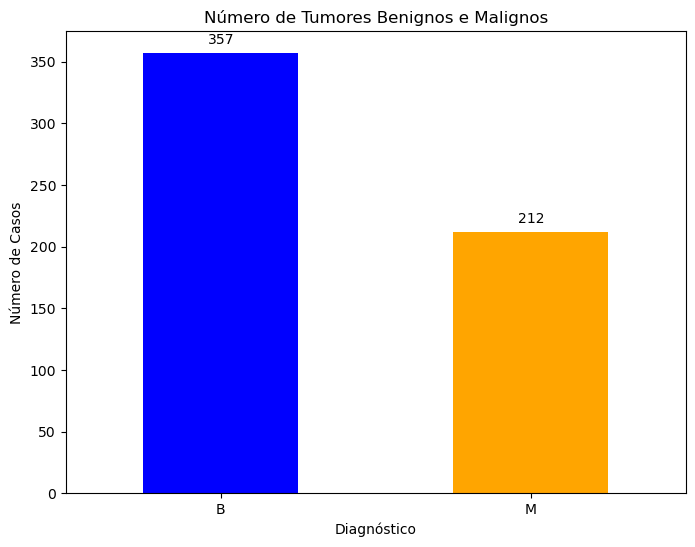

In [9]:
# Grafico de barras para saber o número de tumores Benignos e Malignos
plt.figure(figsize=(8, 6))
count_classes.plot(kind='bar', color=['blue', 'orange'])
plt.title('Número de Tumores Benignos e Malignos')
plt.xlabel('Diagnóstico')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)

# Adicionar os valores em cima das a
for i, value in enumerate(count_classes):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')
plt.show()

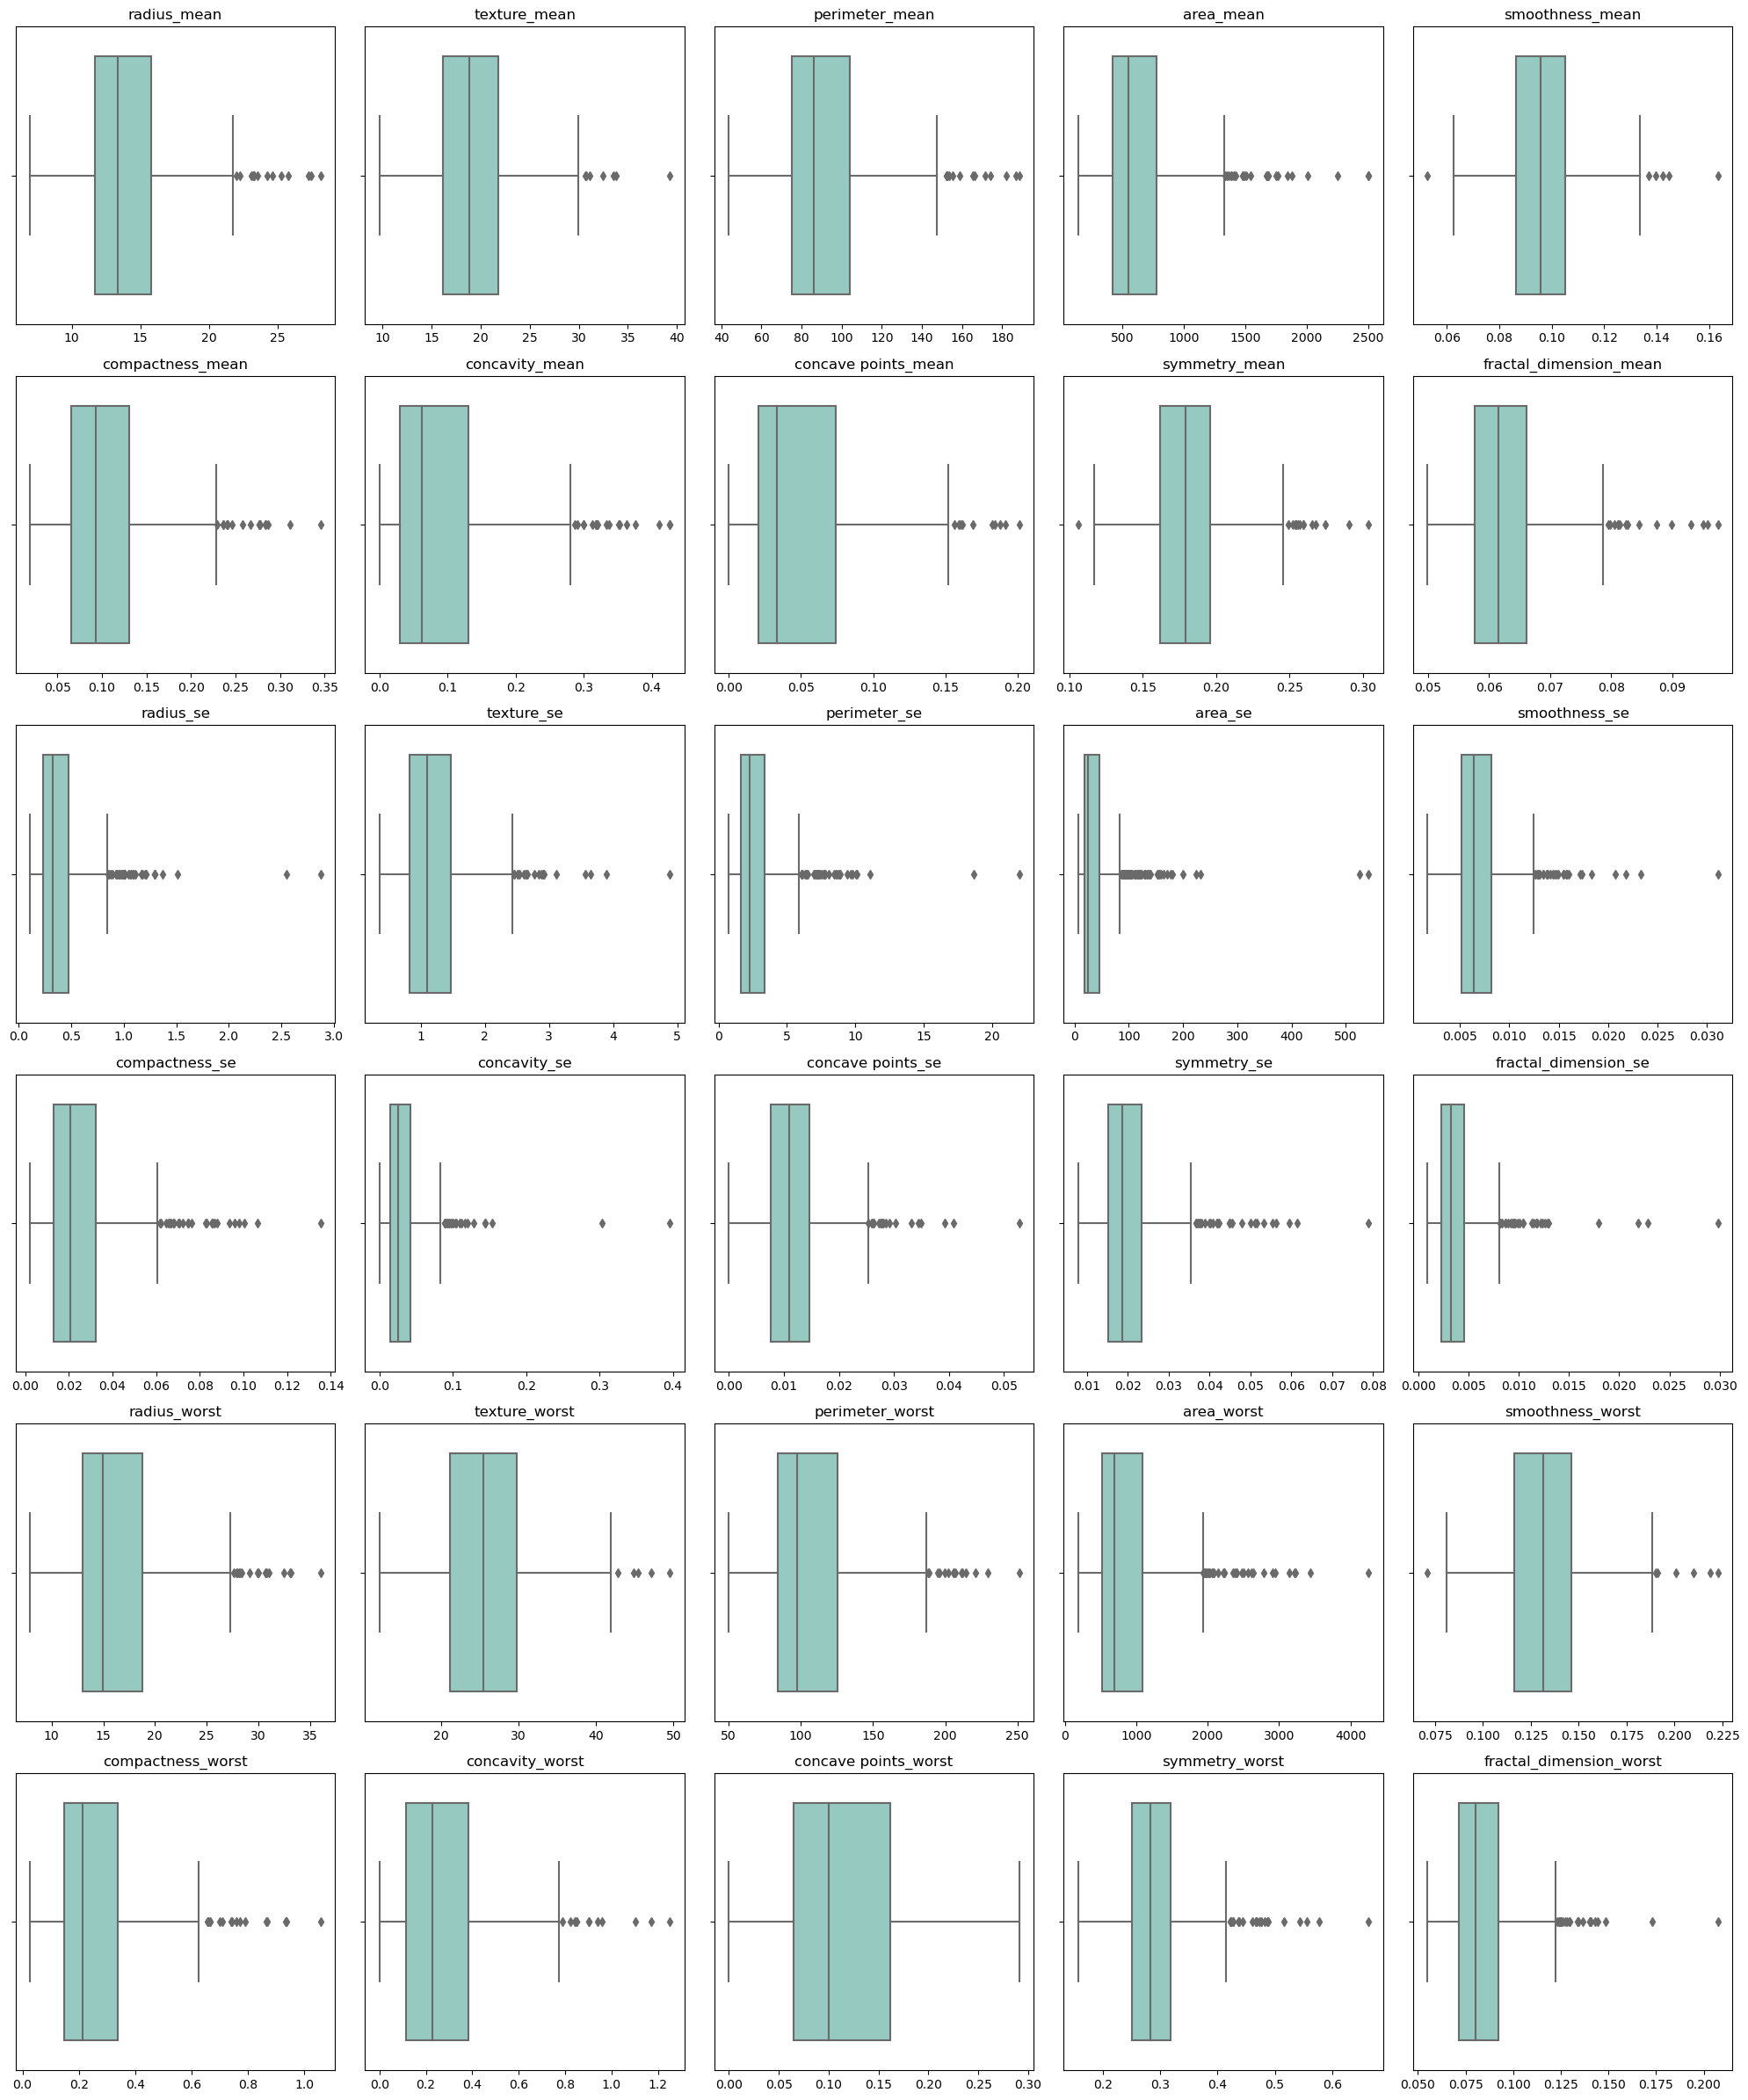

In [10]:
# Boxplot feito para observar o comportamento de cada variável
df_BC_noID = df_BC.drop(columns=['id','diagnosis']) # Remover colunas desnecessárias, como o ID do paciente, diagnostico 

num_cols = len(df_BC_noID.columns)
num_per_row = 5
num_rows = (num_cols - 1) // num_per_row + 1

plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(df_BC_noID.columns):
    plt.subplot(num_rows, num_per_row, i + 1)
    sns.boxplot(x=df_BC_noID[column], palette="Set3")
    plt.title(column)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

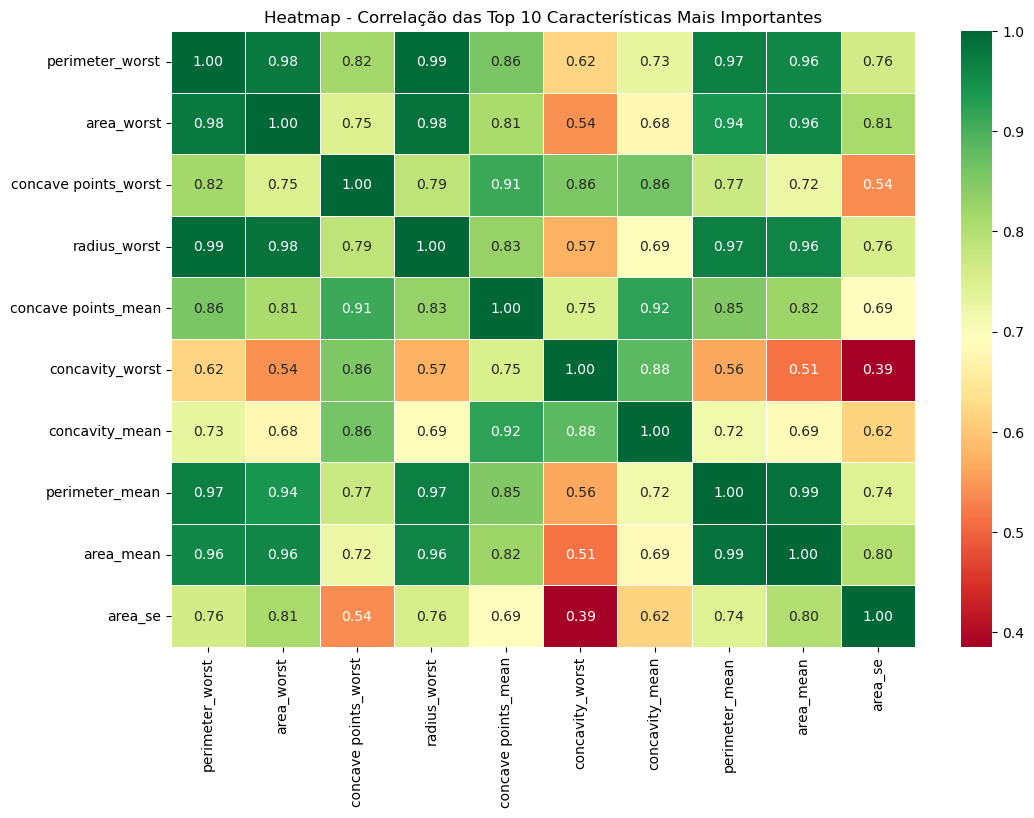

In [11]:
# Dividir o conjunto de dados em features (X) e target (y)
X = df_BC.drop(columns=['diagnosis'])  # Remova a coluna alvo e a coluna não identificada, se necessário
y = df_BC['diagnosis']

# Inicializar o classificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

y = y.map({'B': 0, 'M': 1})

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o classificador
rf.fit(X_train, y_train)

# Obter a importância das características
feature_importances = rf.feature_importances_

# Criar um DataFrame com a importância das características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar o DataFrame por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Criar um DataFrame apenas com as top 10 características mais importantes
top_10_features = feature_importance_df.head(10)

# Criar uma matriz de correlação apenas com as top 10 características mais importantes
top_10_corr = X[top_10_features['Feature']].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_10_corr, annot=True, cmap = 'RdYlGn', fmt=".2f", linewidths=.5)
plt.title('Heatmap - Correlação das Top 10 Características Mais Importantes')
plt.show()

In [12]:
# Padronizar as características (opcional, mas geralmente recomendado para regressão logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regressão logística


Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



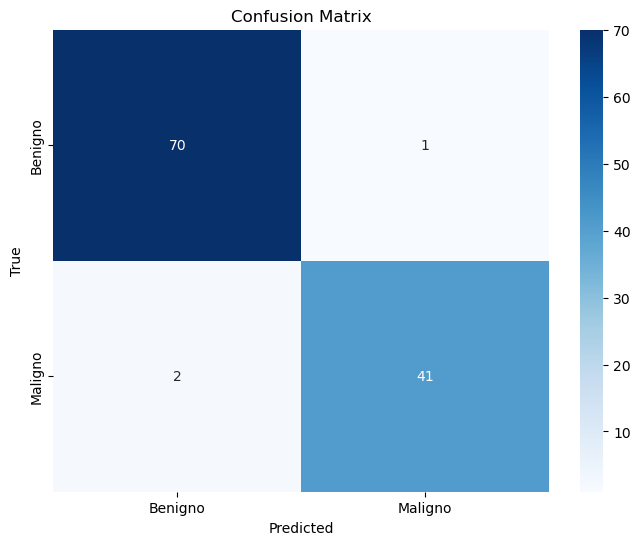

In [13]:
# Inicializar e treinar o modelo de regressão logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = log_reg.predict(X_test_scaled)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calcular a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotar a confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Árvores de Decisão (Decision Trees )

Decision Tree Accuracy: 0.9385964912280702

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


Decision Tree Confusion Matrix:


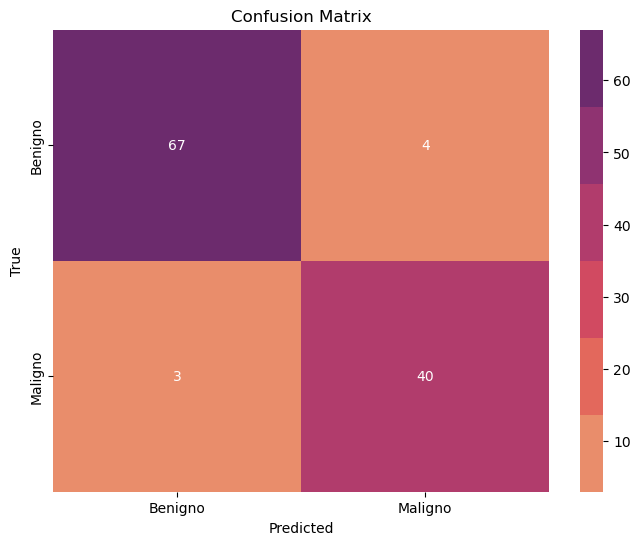

In [14]:
# Inicializar e treinar o modelo de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Fazer previsões com Árvore de Decisão
dt_y_pred = dt_classifier.predict(X_test_scaled)

# Avaliar o desempenho do modelo de Árvore de Decisão
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("\nDecision Tree Confusion Matrix:")

dt_cm = confusion_matrix(y_test, dt_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(dt_cm, annot=True, cmap=sns.color_palette("flare"), fmt='d', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Florestas Aleatórias (Random Florests)


Random Forest Accuracy: 0.9649122807017544

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Random Forest Confusion Matrix:


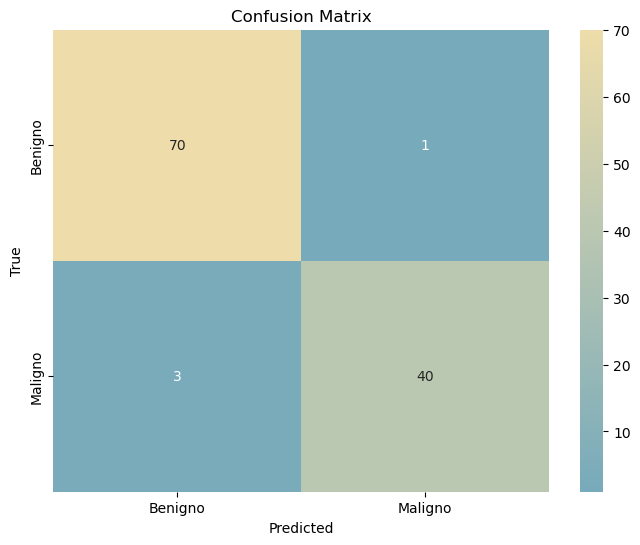

In [15]:
# Inicializar e treinar o modelo de Floresta Aleatória
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Fazer previsões com Floresta Aleatória
rf_y_pred = rf_classifier.predict(X_test_scaled)

# Avaliar o desempenho do modelo de Floresta Aleatória
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nRandom Forest Confusion Matrix:")

rd_cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(rd_cm, annot=True, cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), fmt='d', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Gradient Boosting Machines (GBM)

GBM Accuracy: 0.9473684210526315

GBM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


GBM Confusion Matrix:


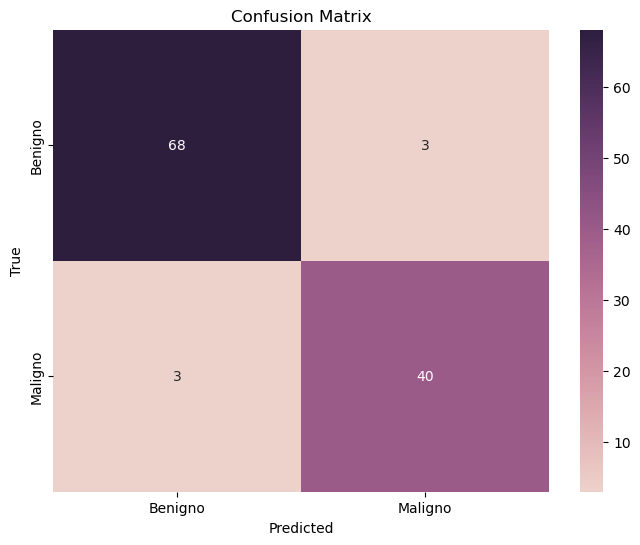

In [16]:
# Inicializar e treinar o modelo GBM
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_scaled, y_train)

# Fazer previsões com GBM
gbm_y_pred = gbm_classifier.predict(X_test_scaled)

# Avaliar o desempenho do modelo GBM
gbm_accuracy = accuracy_score(y_test, gbm_y_pred)
print("GBM Accuracy:", gbm_accuracy)
print("\nGBM Classification Report:")
print(classification_report(y_test, gbm_y_pred))
print("\nGBM Confusion Matrix:")

gbm_cm = confusion_matrix(y_test, gbm_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(gbm_cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='d', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### XGBoost

XGBoost Accuracy: 0.956140350877193

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


XGBoost Confusion Matrix:


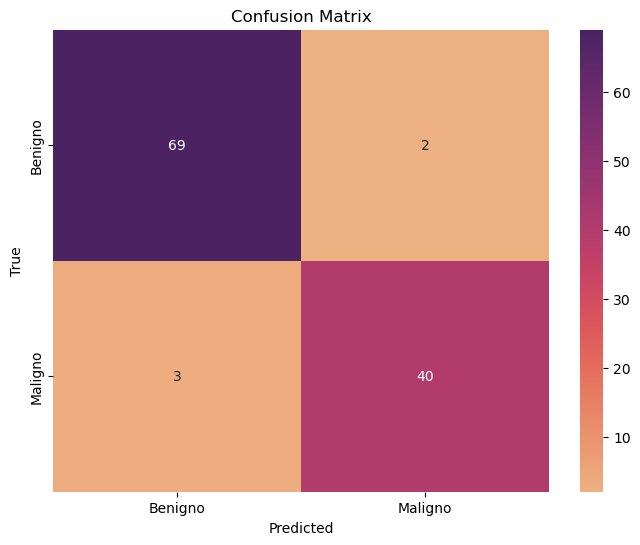

In [17]:

# Inicializar e treinar o modelo XGBoost
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

# Fazer previsões com XGBoost
xgb_y_pred = xgb_classifier.predict(X_test_scaled)

# Avaliar o desempenho do modelo XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print("XGBoost Accuracy:", xgb_accuracy)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))
print("\nXGBoost Confusion Matrix:")
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(xgb_cm, annot=True, cmap='flare', fmt='d', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Comparando todos modelos feitos acima

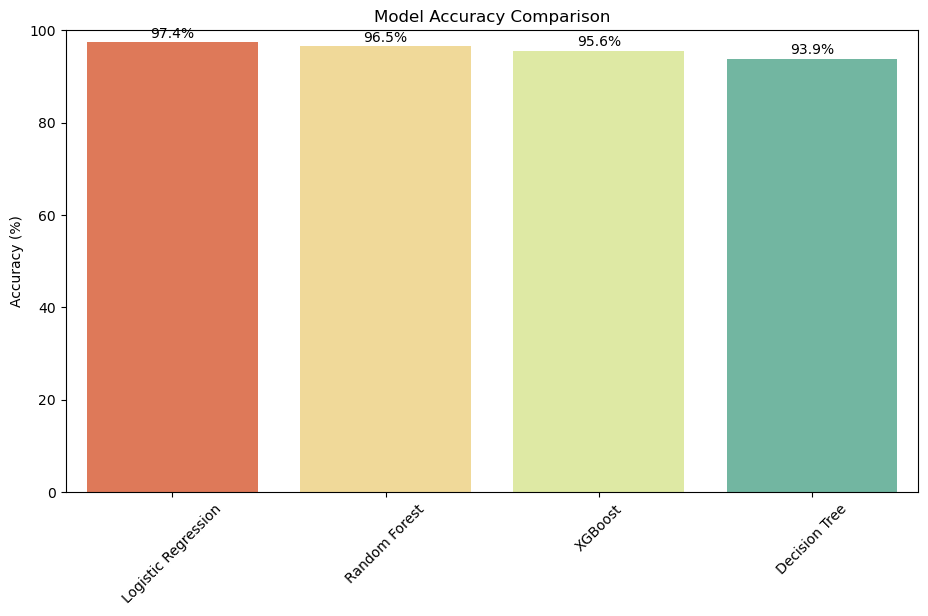

In [19]:
# Inicializar e treinar os modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix
    }

# Obter as acurácias dos modelos em porcentagem
accuracies = [result['accuracy'] * 100 for result in results.values()]

# Plotar a comparação da acurácia dos modelos com acurácia em porcentagem em cima das barras
plt.figure(figsize=(11, 6))
sns.barplot(x=list(results.keys()), y=accuracies, palette='Spectral')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)

# Adicionar acurácia em porcentagem em cima das barras
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center')

plt.show()

#### 
Os modelos de aprendizado de máquina desenvolvidos para prever o diagnóstico de câncer de mama mostraram desempenho satisfatório, com acurácias geralmente superiores a 90%. Embora tenhamos observado algumas diferenças entre os modelos, todos foram capazes de fornecer resultados promissores. A análise da importância das características revelou insights valiosos sobre os fatores mais relevantes para a detecção do câncer de mama. No entanto, a escolha do modelo ideal pode depender de considerações como interpretabilidade e desempenho. Apesar das limitações, este estudo destaca o potencial dos modelos de aprendizado de máquina para auxiliar no diagnóstico precoce e tratamento eficaz do câncer de mama, fornecendo informações úteis para profissionais de saúde.